<a href="https://colab.research.google.com/github/krishnakaushik25/DataQuest-Guided-Projects/blob/main/Hacker_News_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Hacker News Posts
    
![Hacker%20News.jpg](attachment:Hacker%20News.jpg)

# Introduction

Hacker News (sometimes abbreviated as HN) is a social news website focusing on computer science and entrepreneurship. Hacker News was started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result.

The word hacker in "Hacker News" is used in its original meaning and refers to the hacker culture which consists of people who enjoy tinkering with technology.

You can find the data set [here](https://www.kaggle.com/hacker-news/hacker-news-posts, 'here'). As part of this DataQuest training project, the data file was reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that didn't receive any comments and then randomly sampling from the remaining submissions.

## Project Goal

This project focus will be limited to question type posts and comparing the average number of comments/responses to questions within each hour of a day. The purpose in doing this is to determine if the data analysis results will provide best time of day to post questions where I would expect the highest frequency of comments/responses.

**NOTE: The data file for this project covers the time period Aug. 2015 to Aug. 2016. So any conclusions drawn from this data regarding optimum hour of day to post questions yielding highest volume of comments is relevant to that time period. We are now five years later and it's possible the results covering let's say the last year (2020-2021) could be very different.**

# Data Column Descriptions

Below are descriptions of the columns::

- **<span style="color:red">title:</span>** title of the post (self explanatory)

- **<span style="color:red">url:</span>** the url of the item being linked to

- **<span style="color:red">num_points:</span>** the number of upvotes the post received

- **<span style="color:red">num_comments:</span>** the number of comments the post received

- **<span style="color:red">author:</span>** the name of the account that made the post

- **<span style="color:red">created_at:</span>** the date and time the post was made (the time zone is Eastern Time in the US)

In [ ]:
# import python libaries
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats
import random
import string
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
import seaborn as sns
from numpy.random import seed, randint
from IPython.display import HTML, display, Markdown
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Import 'hacker_news.csv' file
# and create a list.
opened_file = open('hacker_news.csv')
from csv import reader
read_file = reader(opened_file)
hn_raw = list(read_file)
display(hn_raw[:5])

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'],
 ['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  '52',
  'ne0phyte',
  '8/4/2016 11:52'],
 ['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  '10',
  'josep2',
  '1/26/2016 19:30'],
 ['11964716',
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  '2',
  '1',
  'vezycash',
  '6/23/2016 22:20'],
 ['11919867',
  'Technology ventures: From Idea to Enterprise',
  'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
  '3',
  '1',
  'hswarna',
  '6/17/2016 0:01']]

In [ ]:
# create a DataFrame from the imported file.
df_hn = pd.read_csv('hacker_news.csv')
print(df_hn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20100 non-null  int64 
 1   title         20100 non-null  object
 2   url           17660 non-null  object
 3   num_points    20100 non-null  int64 
 4   num_comments  20100 non-null  int64 
 5   author        20100 non-null  object
 6   created_at    20100 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB
None


In [ ]:
# Split the list into two files;
# one with the header information only
# and one excluding the header information.
headers = hn_raw[0]
hn_raw = hn_raw[1:]
print(headers)
print('\n')
display(hn_raw[:5])

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']




[['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  '52',
  'ne0phyte',
  '8/4/2016 11:52'],
 ['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  '10',
  'josep2',
  '1/26/2016 19:30'],
 ['11964716',
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  '2',
  '1',
  'vezycash',
  '6/23/2016 22:20'],
 ['11919867',
  'Technology ventures: From Idea to Enterprise',
  'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
  '3',
  '1',
  'hswarna',
  '6/17/2016 0:01'],
 ['10301696',
  'Note by Note: The Making of Steinway L1037 (2007)',
  'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
  '8',
  '2',
  'walterbell',
  '9/30/2015 4:12']]

## Observe Distribution of Comment Quantities per Post

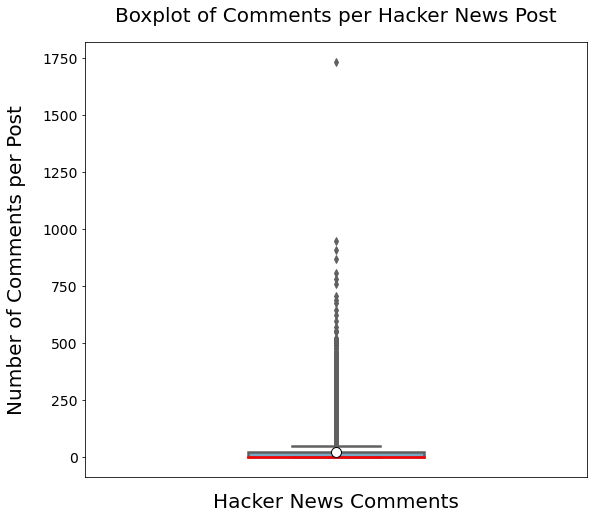

In [ ]:
# select column to chart.
df1 = df_hn['num_comments']

# use Seaborn coding to generate box and whisker plot. 
fig, ax = plt.subplots(figsize=(9,8))
sns.boxplot(data=df1, width = 0.35, linewidth=2.5, palette='Blues',
            showmeans=True, medianprops={'color':'red'}, meanprops={'marker':'o',
            'markerfacecolor':'white', 'markeredgecolor':'black',
            'markersize':'10'})
plt.title('Boxplot of Comments per Hacker News Post', fontsize=20, pad=20)
plt.xlabel('Hacker News Comments', fontsize=20, labelpad = 16)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

plt.ylabel('Number of Comments per Post', fontsize=20, labelpad = 16)
plt.show()

## Executive Decision

The box and whisker plot shows a fairly large quantity of outliers for number of comments per post. Since I will be calculating average comments per hour per post later in this project, I think it would be prudent to eliminate some of the outliers.

**Outliers can easily distort calculated averages which I don't want to do since comparisons between averages will be made in this project.**

Looking at the distribution above, I will make an executive decision and decide to remove values greater than 500. There will still be some outliers, but not as influential as the ones above 500.

In [ ]:
# select rows with comment quantities less than 501.
for thing in hn_raw:
    thing[4] = int(thing[4])
hn = [item for item in hn_raw if item[4] < 501]

display(hn[:3])

[['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  52,
  'ne0phyte',
  '8/4/2016 11:52'],
 ['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  10,
  'josep2',
  '1/26/2016 19:30'],
 ['11964716',
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  '2',
  1,
  'vezycash',
  '6/23/2016 22:20']]

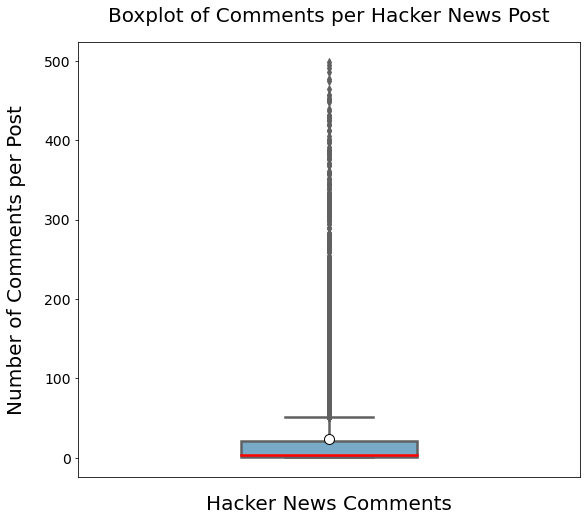

In [ ]:
# select column to chart.
df_hn1 = df_hn[df_hn["num_comments"] < 501]
df2 = df_hn1["num_comments"]

# use Seaborn coding to generate box and whisker plot. 
fig, ax = plt.subplots(figsize=(9,8))
sns.boxplot(data=df2, width = 0.35, linewidth=2.5, palette='Blues',
            showmeans=True, medianprops={'color':'red'}, meanprops={'marker':'o',
            'markerfacecolor':'white', 'markeredgecolor':'black',
            'markersize':'10'})
plt.title('Boxplot of Comments per Hacker News Post', fontsize=20, pad=20)
plt.xlabel('Hacker News Comments', fontsize=20, labelpad = 18)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

plt.ylabel('Number of Comments per Post', fontsize=20, labelpad = 18)
plt.show()

## Confirmed Data Clean Up

The box plot above confirms comments per post quantities above 500 have been removed.

Removing comment quantities per post above 500 only reduced the total question type posts by 0.3%. Regarding missing data, that I would say is not of concern in terms of potentially affecting the final conclusion.

In [ ]:
# extract "Ask HN" and "Show HN" type posts.
# quantify the number of each over.
# include posts without "Ask HN", but that
# have ? at end of statement.
ask_posts = []
show_posts = []
question = []
other_posts = []
for row in hn:
    title = row[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    elif title.lower().endswith('?') and "ask hn" not in question:
        question.append(row) 
    else:
        other_posts.append(row)
    
print('Total Ask HNs Posts = ', len(ask_posts), '\n')  
print('Total Show HNs Posts = ', len(show_posts), '\n')
print('Total Questions without Ask HN = ', len(question), '\n')
print('Total Other Posts = ', len(other_posts))

Total Ask HNs Posts =  1738 

Total Show HNs Posts =  1162 

Total Questions without Ask HN =  1004 

Total Other Posts =  16168


## Ask HN, Show HN & Questions without Ask HN Totals

The total quantity of Ask HN posts as shown above was 1738, while the total Show HN type posts was 1162.

**<span style="color:red">However, there are 1004 questions that do not include 'Ask HN'.</span>** I will check whether these questions look to be legitimate to consider adding to the ones that do include 'Ask HN'.

In [ ]:
# print out first ten questions that do not include 'Ask HN'.
display(Markdown('<h4><span style="color:blue"> Questions with \'Ask HN\'  </span></h4>'))
display([row[1] for row in ask_posts[:10]])
display(Markdown('<h4><span style="color:blue"> Questions without \'Ask HN\'  </span></h4>'))
display([row[1] for row in question[:10]])

<h4><span style="color:blue"> Questions with 'Ask HN'  </span></h4>

['Ask HN: How to improve my personal website?',
 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?',
 'Ask HN: Aby recent changes to CSS that broke mobile?',
 'Ask HN: Looking for Employee #3 How do I do it?',
 'Ask HN: Someone offered to buy my browser extension from me. What now?',
 'Ask HN: Limiting CPU, memory, and I/O usage on a program for testing',
 'Ask HN: Which framework for a CRUD app in 2016?',
 'Ask HN: Enter market with a well-funded competitor?',
 'Ask HN: Do you use any realtime PaaS/framework and in case you so which one?',
 'Ask HN: Is there a home Dropbox-style solution?  (better explanation inside)']

<h4><span style="color:blue"> Questions without 'Ask HN'  </span></h4>

['How often to update third party libraries?',
 "Ten years later, did Boston's Big Dig deliver?",
 'When there are too many administrators, which ones do *you* fire?',
 'Can Wall Street solve the water crisis in the West?',
 'About What is happening with this world?',
 'Which MacBook can code 8 hours without charging?',
 'How do I provide value to my startup as a non-technical founder?',
 'What is the best android emulator for mac os?',
 'Who the f*ck is this Product Manager at my startup?',
 'Need to list related videos along with their published date in YouTube?']

## Questions without 'Ask HN'

The ten questions shown above **<span style="color:red">without</span>** the 'Ask HN' look to me to be just as legitimate as questions that include 'Ask HN'. They may be worth adding to the list of questions that include 'Ask HN'.

I will determine whether to add those questions by comparing the average number of comments for each of the three post types.

## Determine Average Number of Comments per Post Type

In [ ]:
# calculate the average number of comments/responses
# for each of the three types of posts.

total_ask_comments = 0

for row in ask_posts:
    comments = int(row[4])
    total_ask_comments = total_ask_comments + comments
    
avg_ask_comments = total_ask_comments / len(ask_posts)
print('Total Ask Comments =', total_ask_comments)
print('Average Ask Comments =', avg_ask_comments)
print('Average Rounded Ask Comments =', round(avg_ask_comments))

total_show_comments = 0

for row in show_posts:
    comments = int(row[4])
    total_show_comments = total_show_comments + comments
    
avg_show_comments = total_show_comments / len(show_posts)
print('\n')
print('Total Show Comments =', total_show_comments)
print('Average Show Comments =', avg_show_comments)
print('Average Rounded Show Comments =', round(avg_show_comments))

question_comments = 0

for row in question:
    comments = int(row[4])
    question_comments = question_comments + comments
    
avg_question_comments = question_comments / len(question)
print('\n')
print('Total Question Comments =', question_comments)
print('Average Question Comments =', avg_question_comments)
print('Average Rounded Question Comments =', round(avg_question_comments))

Total Ask Comments = 20033
Average Ask Comments = 11.526467203682394
Average Rounded Ask Comments = 12


Total Show Comments = 11988
Average Show Comments = 10.31669535283993
Average Rounded Show Comments = 10


Total Question Comments = 21586
Average Question Comments = 21.5
Average Rounded Question Comments = 22


## VERY INTERESTING!!

**<span style="color:red">WOW! I find it very interesting that the average comments per 'question without 'Ask HN' is much greater than for questions that include 'Ask HN': <span style="color:blue">22</span> vs. <span style="color:blue">12</span> !!</span>**

The average comments per 'Show HN' post is only **10**.

I would expect a question posted to receive more responses or comments than a post associated with showing something. The individuals posting questions are looking for responses whereas individuals posting something to show are not necessarily looking for responses. Questions invite opportunities for debate among response contributors and may attract more people to respond or comment than would something to be shown on "Hacker News".

Based on these findings I will limit the data analysis to 'question type' posts rather than 'show type' posts. I will focus on determining best time of day to post questions based on highest quantity of comments/responses at that time of day.

**I will also combine the two types of question posts, with and without 'Ask HN' to increase the accuracy of the outcome.**  

## Combine Ask Type Post Lists



In [ ]:
print('Questions with \'Ask HN\' = ', len(ask_posts), '\n')
print('Questions without \'Ask HN\' = ',len(question), '\n')
quest_posts = np.vstack((ask_posts, question))
print('Total Questions =', len(quest_posts), '\n')
print(quest_posts)

Questions with 'Ask HN' =  1738 

Questions without 'Ask HN' =  1004 

Total Questions = 2742 

[['12296411' 'Ask HN: How to improve my personal website?' '' ... '6'
  'ahmedbaracat' '8/16/2016 9:55']
 ['10610020'
  'Ask HN: Am I the only one outraged by Twitter shutting down share counts?'
  '' ... '29' 'tkfx' '11/22/2015 13:43']
 ['11610310' 'Ask HN: Aby recent changes to CSS that broke mobile?' ''
  ... '1' 'polskibus' '5/2/2016 10:14']
 ...
 ['12252371' 'Is the U.S. Due for Radically Raising Taxes for the Rich?'
  'http://www.theatlantic.com/business/archive/2016/08/is-america-due-for-a-tax-hike/494795/?single_page=true'
  ... '1' 'JumpCrisscross' '8/9/2016 3:18']
 ['10469896' 'Is Tesla Doomed?'
  'http://www.roadandtrack.com/car-culture/a26859/bob-lutz-tesla/' ...
  '3' 'tomcam' '10/29/2015 9:10']
 ['10499089'
  'I have $10,000 dollars in my bank account. Am I an entrepreneur?'
  'https://medium.com/@sktgthill/i-have-10-000-dollars-in-my-bank-account-am-i-an-entrepreneur-d3fa3bf4e

## Calculate Average Comments per Hour for Each Question Post

In [ ]:
result_list = []

for row in quest_posts:
    created_at = row[6]
    comments = int(row[4])
    result_list.append([created_at,comments])

print('\n')
print(result_list[:10], '\n')
    
counts_by_hour = {}
comments_by_hour = {}
date_format = "%m/%d/%Y %H:%M"

for row in result_list:
    entry_date = row[0]
    comments = row[1]
    time = dt.datetime.strptime(entry_date, date_format).strftime("%H")
    if time in counts_by_hour:
        counts_by_hour[time] += 1
        comments_by_hour[time] += comments
    else:
        counts_by_hour[time] = 1
        comments_by_hour[time] = comments
        
print(comments_by_hour, '\n')
print(counts_by_hour)

# calculate the average number of comments per post for each hour.
avg_by_hour = []

for hour in counts_by_hour:
    avg_by_hour.append([hour, comments_by_hour[hour] / counts_by_hour[hour]])
    
print('\n')
print('Average Comments by Hour')
print('------------------------')

for row in avg_by_hour:
    hour = row[0]
    average = row[1]
    print(hour, round(average,2))       



[['8/16/2016 9:55', 6], ['11/22/2015 13:43', 29], ['5/2/2016 10:14', 1], ['8/2/2016 14:20', 3], ['10/15/2015 16:38', 17], ['9/26/2015 23:23', 1], ['4/22/2016 12:24', 4], ['11/16/2015 9:22', 1], ['2/24/2016 17:57', 1], ['6/4/2016 17:17', 2]] 

{'09': 622, '13': 2436, '10': 1742, '14': 2665, '16': 2324, '23': 1802, '12': 1960, '17': 2533, '15': 3789, '21': 2395, '20': 2192, '02': 917, '18': 3606, '03': 993, '05': 1296, '19': 2155, '01': 1269, '22': 1427, '08': 1160, '04': 663, '00': 944, '06': 773, '07': 528, '11': 1428} 

{'09': 76, '13': 130, '10': 93, '14': 160, '16': 175, '23': 108, '12': 123, '17': 155, '15': 186, '21': 156, '20': 125, '02': 78, '18': 185, '03': 80, '05': 66, '19': 172, '01': 84, '22': 122, '08': 80, '04': 69, '00': 89, '06': 68, '07': 59, '11': 103}


Average Comments by Hour
------------------------
09 8.18
13 18.74
10 18.73
14 16.66
16 13.28
23 16.69
12 15.93
17 16.34
15 20.37
21 15.35
20 17.54
02 11.76
18 19.49
03 12.41
05 19.64
19 12.53
01 15.11
22 11.7
08 14

## Average Comments per Ask HN Post by Hour

We see in the above output the average comments per Ask HN post by hour. Neither the hours nor averages are in sequential order.

The cell below is set up to change the average comments per hour from the second column to the first column by **"swapping"** and then to sort them from highest to lowest using the **"sorted"** function. This should make it a little easier to draw conclusions.  

In [ ]:
sorted_by_hour = sorted(avg_by_hour)
print(sorted_by_hour)

swap_avg_by_hour = []

for row in avg_by_hour:
    swap_avg_by_hour.append([row[1], row[0]])
sorted_swap = sorted(swap_avg_by_hour, reverse=True)

print('\n')
print(sorted_swap)
print('\n')
time_format = "%H"

print('Top 5 Hours for Ask Posts Comments Across All Days of Week ')
print('-----------------------------------------------------------')
for top_5_hours in sorted_swap[:5]:
    avg_comments = top_5_hours[0]
    hour = top_5_hours[1]
    hour1 = dt.datetime.strptime(hour, time_format).strftime("%H:%M")
    print(hour1, round(avg_comments,2), ' average comments per post')


[['00', 10.606741573033707], ['01', 15.107142857142858], ['02', 11.756410256410257], ['03', 12.4125], ['04', 9.608695652173912], ['05', 19.636363636363637], ['06', 11.367647058823529], ['07', 8.94915254237288], ['08', 14.5], ['09', 8.18421052631579], ['10', 18.731182795698924], ['11', 13.864077669902912], ['12', 15.934959349593496], ['13', 18.73846153846154], ['14', 16.65625], ['15', 20.370967741935484], ['16', 13.28], ['17', 16.34193548387097], ['18', 19.491891891891893], ['19', 12.529069767441861], ['20', 17.536], ['21', 15.352564102564102], ['22', 11.69672131147541], ['23', 16.685185185185187]]


[[20.370967741935484, '15'], [19.636363636363637, '05'], [19.491891891891893, '18'], [18.73846153846154, '13'], [18.731182795698924, '10'], [17.536, '20'], [16.685185185185187, '23'], [16.65625, '14'], [16.34193548387097, '17'], [15.934959349593496, '12'], [15.352564102564102, '21'], [15.107142857142858, '01'], [14.5, '08'], [13.864077669902912, '11'], [13.28, '16'], [12.529069767441861, '1

## Top 5 Peak Hours for Comments per Question Post

The top 5 hours with highest average comments per Ask HN post are shown above.

The top average comments per post (20.37) occurs at the 15:00 hour of the day (3:00 pm), which really means between 3:00 PM and 4:00 PM. According to the data set [documentation](https://www.kaggle.com/hacker-news/hacker-news-posts/home, 'documentation'), the time zone used in Hacker News is Eastern Time in the US. This would make sense to me if the majority of the responders by comment are in the school age range. That time period is about when students get out of school. However, the age of responders is not given in this data set.

Let's take a visual look at the distribution of average comments per hour per question post by means of a histogram. Oftentimes, a picture is worth a thousand words!

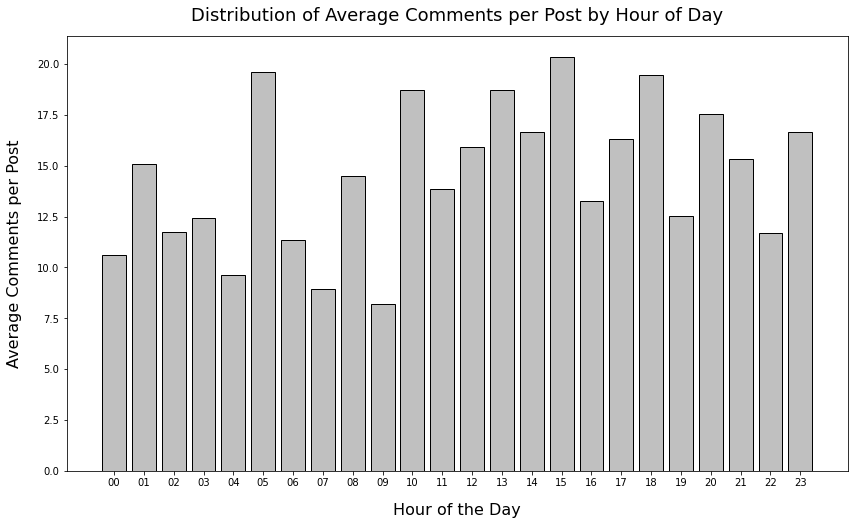

In [ ]:
# convert list of lists to DataFrame.
df = pd.DataFrame(sorted_by_hour)

# plot bar chart to simulate histogram.
df.columns = ["Hour", "Average Comments per Hour"]
x = df["Hour"]
y = df["Average Comments per Hour"]
fig, ax = plt.subplots(figsize=(14,8))
plt.bar(x,y,align='center', ec='black', color='silver')
plt.title('Distribution of Average Comments per Post by Hour of Day', fontsize=18, pad=15)
plt.xlabel('Hour of the Day', fontsize=16, labelpad=15)
plt.ylabel('Average Comments per Post', fontsize=16, labelpad=15)
plt.show()

## Conclusions?

The histogram shows the primary mode at 15 which relates to 15:00 or 3:00 PM. However, it also shows that there are other modes not much less than the one at 3:00 (5:00 AM, 10:00 AM, 1:00 PM, 6:00 PM & 8:00 PM). **<span style="color:red">It's very possible that this distribution relates to a multi-modal one.</span>** 

**<span style="color:red">NOTE:</span>** The primary mode at 3:00 PM to 4:00 PM is the peak period for average comment volume per post, **regardless of day of the week!** Since we have a multi-modal distribution here, this may not be true for each day of the week, especially Saturday and Sunday since school is not attended on the weekend. This causes me to suspect that **<span style="color:blue">day of the week</span>** matters regarding top hour for highest average comments per post.

**This begs me to Dig Deeper and break out the data by Day as well!**

**I will also investigate whether time of year makes a difference, comparing during school season vs. during summer when students are out of school. I based school season on the information provided via Google search: "generally, the academic year runs from early September to the end of May."**

# Digging Deeper


In [ ]:
# this cell is set up to call out day of the week in format
# ('Monday', 'Tuesday' ...) and calculate number of posts
# and number of comments by day of the week.
# then I use the same procedures as in a previous cell further
# above to calculate average number of comments per post by day.

counts_by_day = {}
comments_by_day = {}
date_format = "%m/%d/%Y %H:%M"

for row in result_list:
    entry_date = row[0]
    comments = row[1]
    day = dt.datetime.strptime(entry_date, date_format).strftime("%A")
    if day in counts_by_day:
        counts_by_day[day] += 1
        comments_by_day[day] += comments
    else:
        counts_by_day[day] = 1
        comments_by_day[day] = comments
        
print('\n')
print(comments_by_day, '\n')
print(counts_by_day, '\n')

avg_by_day = []

for day in counts_by_day:
    avg_by_day.append([day, comments_by_day[day] / counts_by_day[day]])
    
print(avg_by_day)



{'Tuesday': 7600, 'Sunday': 5394, 'Monday': 4981, 'Thursday': 5797, 'Saturday': 4460, 'Friday': 6823, 'Wednesday': 6564} 

{'Tuesday': 475, 'Sunday': 260, 'Monday': 422, 'Thursday': 415, 'Saturday': 300, 'Friday': 413, 'Wednesday': 457} 

[['Tuesday', 16.0], ['Sunday', 20.746153846153845], ['Monday', 11.803317535545023], ['Thursday', 13.96867469879518], ['Saturday', 14.866666666666667], ['Friday', 16.520581113801452], ['Wednesday', 14.36323851203501]]


## Average Number of Comments per Post by Day

Looking at the total number of comments per day, we see that the minimum quantity (sample size) is reasonably high (4460) to break down the results by hour within each day and draw conclusions from that.

It's interesting that the number of posts per day is lowest on Saturday and Sunday. Average comments per post within each day is highest for Tuesday, Friday, and Sunday.

In [ ]:
# this cell is set up to break out post date into date and hour and then
# create a list with 3 elements: date, hour and comment qty.
# then, loops are set up separately within each day ('Monday', 'Tuesday' ...)
# to determine average number of comments per post by hour within each day.
import datetime as dt
results_list2 = []
for row in ask_posts:
    created_at = row[6]
    date, time = created_at.split()
    comments = int(row[4])
    results_list2.append([date, time, comments])

print('\n')
print(results_list2[:10])
print('\n')

date_format = "%m/%d/%Y"
hour_format = "%H:%M"
results_list3 = []

for row in results_list2:
    entry_date = row[0]
    entry_hour = row[1]
    comments = row[2]
    date2 = dt.datetime.strptime(entry_date, date_format).strftime("%A")
    hour2 = dt.datetime.strptime(entry_hour, hour_format).strftime("%H")
    results_list3.append([date2, hour2, comments])
    
print(results_list3[:10]) 

counts_by_Mon = {}
comments_by_Mon = {}
results_Mon = []

for row in results_list3:
    if row[0] == 'Monday':
        hour = row[1]
        commentsm = row[2]
        results_Mon.append([hour, commentsm])
    else:
        data = 0
    
for row in results_Mon:
    hour3 = row[0]
    comments3 = row[1]
    if hour3 in counts_by_Mon:
        counts_by_Mon[hour3] += 1
        comments_by_Mon[hour3] += comments3
    else:
        counts_by_Mon[hour3] = 1
        comments_by_Mon[hour3] = comments3
        
avg_by_hour_Mon = []

for hour in counts_by_Mon:
    avg_by_hour_Mon.append([hour, comments_by_Mon[hour] / counts_by_Mon[hour]])
    
print('\n')
for hour in avg_by_hour_Mon:
    sorted_by_Mon = sorted(avg_by_hour_Mon)

time_format = "%H"    

print('Average Comments by Hour on Mondays')
print('-----------------------------------')    
for row in sorted_by_Mon:
    hour = row[0]
    hour1 = dt.datetime.strptime(hour, time_format).strftime("%H:%M")
    avg_comments = row[1]
    print(hour1, round(avg_comments,2))

counts_by_Tue = {}
comments_by_Tue = {}
results_Tue = []

for row in results_list3:
    if row[0] == 'Tuesday':
        hour = row[1]
        commentsm = row[2]
        results_Tue.append([hour, commentsm])
    else:
        data = 0

for row in results_Tue:
    hour3 = row[0]
    comments3 = row[1]
    if hour3 in counts_by_Tue:
        counts_by_Tue[hour3] += 1
        comments_by_Tue[hour3] += comments3
    else:
        counts_by_Tue[hour3] = 1
        comments_by_Tue[hour3] = comments3
    
avg_by_hour_Tue = []

for hour in counts_by_Tue:
    avg_by_hour_Tue.append([hour, comments_by_Tue[hour] / counts_by_Tue[hour]])
    
print('\n')
for hour in avg_by_hour_Tue:
    sorted_by_Tue = sorted(avg_by_hour_Tue)

print('Average Comments by Hour on Tuesdays')
print('------------------------------------')    
for row in sorted_by_Tue:
    hour = row[0]
    hour1 = dt.datetime.strptime(hour, time_format).strftime("%H:%M")
    avg_comments = row[1]
    print(hour1, round(avg_comments,2))

counts_by_Wed = {}
comments_by_Wed = {}    
results_Wed = []

for row in results_list3:
    if row[0] == 'Wednesday':
        hour = row[1]
        commentsm = row[2]
        results_Wed.append([hour, commentsm])
    else:
        data = 0


for row in results_Wed:
    hour3 = row[0]
    comments3 = row[1]
    if hour3 in counts_by_Wed:
        counts_by_Wed[hour3] += 1
        comments_by_Wed[hour3] += comments3
    else:
        counts_by_Wed[hour3] = 1
        comments_by_Wed[hour3] = comments3

avg_by_hour_Wed = []

for hour in counts_by_Wed:
    avg_by_hour_Wed.append([hour, comments_by_Wed[hour] / counts_by_Wed[hour]])
    
print('\n')
for hour in avg_by_hour_Wed:
    sorted_by_Wed = sorted(avg_by_hour_Wed)

print('Average Comments by Hour on Wednesdays')
print('--------------------------------------')    
for row in sorted_by_Wed:
    hour = row[0]
    hour1 = dt.datetime.strptime(hour, time_format).strftime("%H:%M")
    avg_comments = row[1]
    print(hour1, round(avg_comments,2))


counts_by_Thur = {}
comments_by_Thur = {}
results_Thur = []

for row in results_list3:
    if row[0] == 'Thursday':
        hour = row[1]
        commentsm = row[2]
        results_Thur.append([hour, commentsm])
    else:
        data = 0


for row in results_Thur:
    hour3 = row[0]
    comments3 = row[1]
    if hour3 in counts_by_Thur:
        counts_by_Thur[hour3] += 1
        comments_by_Thur[hour3] += comments3
    else:
        counts_by_Thur[hour3] = 1
        comments_by_Thur[hour3] = comments3

avg_by_hour_Thur = []

for hour in counts_by_Thur:
    avg_by_hour_Thur.append([hour, comments_by_Thur[hour] / counts_by_Thur[hour]])
    
print('\n')
for hour in avg_by_hour_Thur:
    sorted_by_Thur = sorted(avg_by_hour_Thur)

print('Average Comments by Hour on Thursdays')
print('-------------------------------------')    
for row in sorted_by_Thur:
    hour = row[0]
    hour1 = dt.datetime.strptime(hour, time_format).strftime("%H:%M")
    avg_comments = row[1]
    print(hour1, round(avg_comments,2))

counts_by_Fri = {}
comments_by_Fri = {}
results_Fri = []

for row in results_list3:
    if row[0] == 'Friday':
        hour = row[1]
        commentsm = row[2]
        results_Fri.append([hour, commentsm])
    else:
        data = 0

for row in results_Fri:
    hour3 = row[0]
    comments3 = row[1]
    if hour3 in counts_by_Fri:
        counts_by_Fri[hour3] += 1
        comments_by_Fri[hour3] += comments3
    else:
        counts_by_Fri[hour3] = 1
        comments_by_Fri[hour3] = comments3

avg_by_hour_Fri = []

for hour in counts_by_Fri:
    avg_by_hour_Fri.append([hour, comments_by_Fri[hour] / counts_by_Fri[hour]])
    
print('\n')
for hour in avg_by_hour_Fri:
    sorted_by_Fri = sorted(avg_by_hour_Fri)

print('Average Comments by Hour on Fridays')
print('-----------------------------------')    
for row in sorted_by_Fri:
    hour = row[0]
    hour1 = dt.datetime.strptime(hour, time_format).strftime("%H:%M")
    avg_comments = row[1]
    print(hour1, round(avg_comments,2))
        
counts_by_Sat = {}
comments_by_Sat = {}
results_Sat = []

for row in results_list3:
    if row[0] == 'Saturday':
        hour = row[1]
        commentsm = row[2]
        results_Sat.append([hour, commentsm])
    else:
        data = 0

for row in results_Sat:
    hour3 = row[0]
    comments3 = row[1]
    if hour3 in counts_by_Sat:
        counts_by_Sat[hour3] += 1
        comments_by_Sat[hour3] += comments3
    else:
        counts_by_Sat[hour3] = 1
        comments_by_Sat[hour3] = comments3

avg_by_hour_Sat = []

for hour in counts_by_Sat:
    avg_by_hour_Sat.append([hour, comments_by_Sat[hour] / counts_by_Sat[hour]])
    
print('\n')
for hour in avg_by_hour_Sat:
    sorted_by_Sat = sorted(avg_by_hour_Sat)

print('Average Comments by Hour on Saturdays')
print('-------------------------------------')    
for row in sorted_by_Sat:
    hour = row[0]
    hour1 = dt.datetime.strptime(hour, time_format).strftime("%H:%M")
    avg_comments = row[1]
    print(hour1, round(avg_comments,2))
        
counts_by_Sun = {}
comments_by_Sun = {}
results_Sun = []

for row in results_list3:
    if row[0] == 'Sunday':
        hour = row[1]
        commentsm = row[2]
        results_Sun.append([hour, commentsm])
    else:
        data = 0

for row in results_Sun:
    hour3 = row[0]
    comments3 = row[1]
    if hour3 in counts_by_Sun:
        counts_by_Sun[hour3] += 1
        comments_by_Sun[hour3] += comments3
    else:
        counts_by_Sun[hour3] = 1
        comments_by_Sun[hour3] = comments3

avg_by_hour_Sun = []

for hour in counts_by_Sun:
    avg_by_hour_Sun.append([hour, comments_by_Sun[hour] / counts_by_Sun[hour]])
    
print('\n')
for hour in avg_by_hour_Sun:
    sorted_by_Sun = sorted(avg_by_hour_Sun)

print('Average Comments by Hour on Sundays')
print('-----------------------------------')    
for row in sorted_by_Sun:
    hour = row[0]
    hour1 = dt.datetime.strptime(hour, time_format).strftime("%H:%M")
    avg_comments = row[1]
    print(hour1, round(avg_comments,2))



[['8/16/2016', '9:55', 6], ['11/22/2015', '13:43', 29], ['5/2/2016', '10:14', 1], ['8/2/2016', '14:20', 3], ['10/15/2015', '16:38', 17], ['9/26/2015', '23:23', 1], ['4/22/2016', '12:24', 4], ['11/16/2015', '9:22', 1], ['2/24/2016', '17:57', 1], ['6/4/2016', '17:17', 2]]


[['Tuesday', '09', 6], ['Sunday', '13', 29], ['Monday', '10', 1], ['Tuesday', '14', 3], ['Thursday', '16', 17], ['Saturday', '23', 1], ['Friday', '12', 4], ['Monday', '09', 1], ['Wednesday', '17', 1], ['Saturday', '17', 2]]


Average Comments by Hour on Mondays
-----------------------------------
00:00 9.4
01:00 10.5
02:00 3.6
03:00 7.0
04:00 8.5
05:00 2.9
06:00 19.71
07:00 6.64
08:00 8.43
09:00 5.0
10:00 17.33
11:00 5.71
12:00 11.0
13:00 5.92
14:00 10.25
15:00 36.5
16:00 5.52
17:00 6.62
18:00 7.62
19:00 6.83
20:00 3.45
21:00 11.8
22:00 4.6
23:00 5.67


Average Comments by Hour on Tuesdays
------------------------------------
00:00 2.85
01:00 17.33
02:00 7.87
03:00 10.0
04:00 8.75
05:00 2.33
06:00 3.4
07:00 2.6
08:0

In [ ]:
# convert list of lists for each day to DataFrames.
df_Mon = pd.DataFrame(sorted_by_Mon)
df_Mon.columns = ["Hour", "Monday"]
df_Tue = pd.DataFrame(sorted_by_Tue)
df_Tue.columns = ["Hour", "Tuesday"]
df_Wed = pd.DataFrame(sorted_by_Wed)
df_Wed.columns = ["Hour", "Wednesday"]
df_Thur = pd.DataFrame(sorted_by_Thur)
df_Thur.columns = ["Hour", "Thursday"]
df_Fri = pd.DataFrame(sorted_by_Fri)
df_Fri.columns = ["Hour", "Friday"]
df_Sat = pd.DataFrame(sorted_by_Sat)
df_Sat.columns = ["Hour", "Saturday"]
df_Sun = pd.DataFrame(sorted_by_Sun)
df_Sun.columns = ["Hour", "Sunday"]

df_Mon['Hour'] = df_Mon['Hour'].astype(int)
df_Tue['Hour'] = df_Tue['Hour'].astype(int)
df_Wed['Hour'] = df_Wed['Hour'].astype(int)
df_Thur['Hour'] = df_Thur['Hour'].astype(int)
df_Fri['Hour'] = df_Fri['Hour'].astype(int)
df_Sat['Hour'] = df_Sat['Hour'].astype(int)
df_Sun['Hour'] = df_Sun['Hour'].astype(int)

df_combined = pd.DataFrame()
df_combined['Hour'] = df_Mon['Hour']
df_combined['Monday'] = df_Mon['Monday']
df_combined['Tuesday'] = df_Tue['Tuesday']
df_combined['Wednesday'] = df_Wed['Wednesday']
df_combined['Thursday'] = df_Thur['Thursday']
df_combined['Friday'] = df_Fri['Friday']
df_combined['Saturday'] = df_Sat['Saturday']
df_combined['Sunday'] = df_Sun['Sunday']

display(df_combined.head())

,Hour,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,9.4,2.846154,10.000000,11.888889,5.000000,5.250000,53.000000
1,1,10.5,17.333333,5.200000,10.727273,10.750000,15.285714,12.333333
2,2,3.6,7.866667,6.461538,3.600000,17.888889,10.875000,13.500000
3,3,7.0,10.000000,5.600000,10.363636,8.777778,5.250000,9.000000
4,4,8.5,8.750000,2.500000,5.111111,6.000000,8.833333,8.666667


## Display Average Comments per Post per Hour

It's ok to read data in table format, but it's just not as informative as displaying any patterns that may be revealed by means of charts/graphs.

I will generate a bar/histogram type chart for each day that will clearly show peak hours of comment qty. per post per hour are not the same every day. I will purposely set the y-axis range the same (0, 55) for each day so we can make relative visual comparisons between each day.

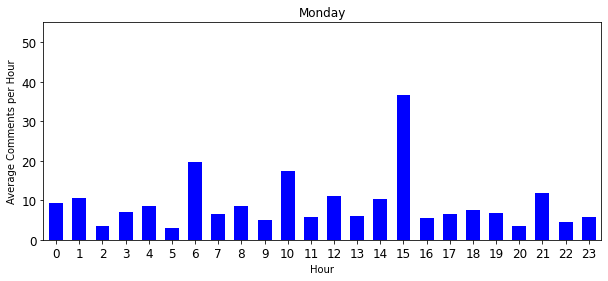

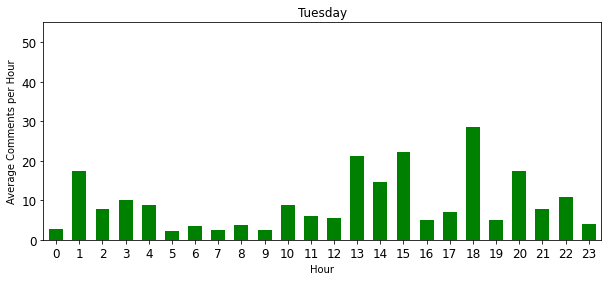

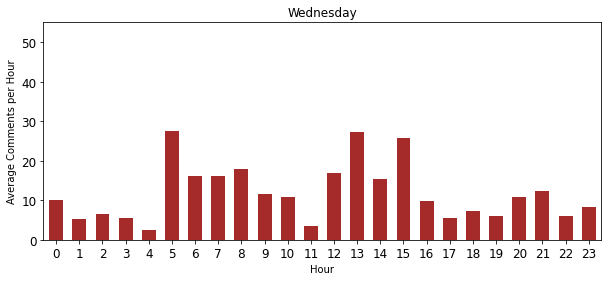

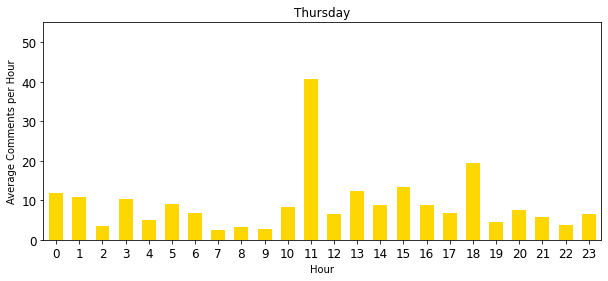

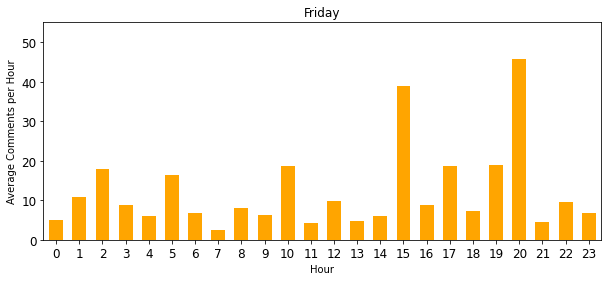

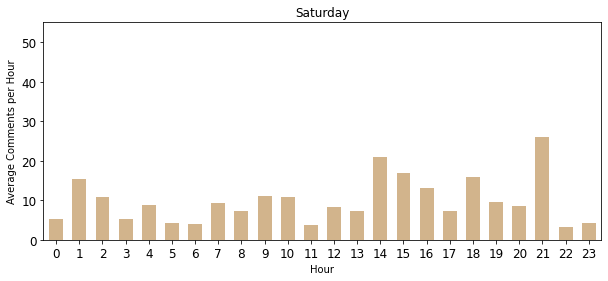

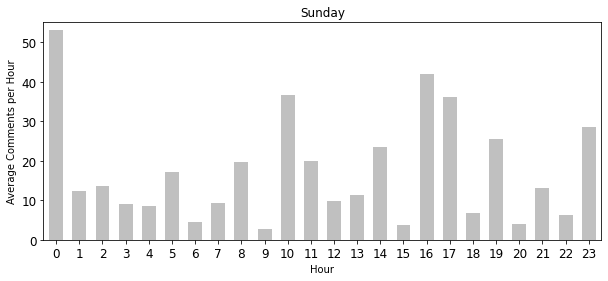

In [ ]:
# plot bar charts for each day.
index = df_combined['Hour']
df_Mon1 = df_Mon.drop(['Hour'], axis=1)
df_Tue1 = df_Tue.drop(['Hour'], axis=1)
df_Wed1 = df_Wed.drop(['Hour'], axis=1)
df_Thur1 = df_Thur.drop(['Hour'], axis=1)
df_Fri1 = df_Fri.drop(['Hour'], axis=1)
df_Sat1 = df_Sat.drop(['Hour'], axis=1)
df_Sun1 = df_Sun.drop(['Hour'], axis=1)

df_Mon1.plot.bar(rot=0, subplots=True, figsize=(10,4), width=0.6, color='blue', legend=False,\
                 fontsize=12, ylabel="Average Comments per Hour", xlabel="Hour", ylim=(0, 55))
df_Tue1.plot.bar(rot=0, subplots=True, figsize=(10,4), width=0.6, color='green', legend=False,\
                 fontsize=12, ylabel="Average Comments per Hour", xlabel="Hour", ylim=(0,55))
df_Wed1.plot.bar(rot=0, subplots=True, figsize=(10,4), width=0.6, color='brown', legend=False,\
                 fontsize=12, ylabel="Average Comments per Hour", xlabel="Hour", ylim=(0,55))
df_Thur1.plot.bar(rot=0, subplots=True, figsize=(10,4), width=0.6, color='gold', legend=False,\
                  fontsize=12, ylabel="Average Comments per Hour", xlabel="Hour", ylim=(0,55))
df_Fri1.plot.bar(rot=0, subplots=True, figsize=(10,4), width=0.6, color='orange', legend=False,\
                 fontsize=12, ylabel="Average Comments per Hour", xlabel="Hour", ylim=(0,55))
df_Sat1.plot.bar(rot=0, subplots=True, figsize=(10,4), width=0.6, color='tan', legend=False,\
                 fontsize=12, ylabel="Average Comments per Hour", xlabel="Hour", ylim=(0,55))
df_Sun1.plot.bar(rot=0, subplots=True, figsize=(10,4), width=0.6, color='silver', legend=False,\
                 fontsize=12, ylabel="Average Comments per Hour", xlabel="Hour", ylim=(0,55))
plt.show()

## Daily Observations

We see from the graphs above that the distribution of average comments per post per hour is not the same each day.
I will provide a table below that not only shows peak hours each day for full year, but also peak hours each day during school season and peak hours each day during summer.

I generated the school season and summer season data in separate Jupyter Notebooks. I did not want to make this file too long.

![Table2.jpg](attachment:Table2.jpg)

## Conclusions and Thoughts

**As per the table above, the peak hours for average number of comments per question type post are <span style="color:red">not only different for each day of the week but also for season of the year (school season vs. summer)!!</span>**

Since I broke out the data by school season and summer in addition to by day, I wouldn't go by any of the peak hours for "Full Year" as a guide to post a question. **So, during which hours should I post a question to increase my chance of receiving maximum comments?**

**<span style="color:blue">My answer is: "It depends".</span>**

First, it depends on the type of question I intend to pose and whether it matters what age range I'm hoping to receive responses/comments from: (youth, young adults, middle age adults, seniors ...). If I'm interested in comments from the younger generation, then I would go by the peak hour during school season as long as the date I'm posting the question is during school season. If age range doesn't matter, then I would go by the peak hour from the table above based on the season I'm in at the time and whether the need for a response is urgent or not.

Secondly, it depends how urgent my need is to pose a question and get answers. For example, suppose something arises and I need to pose a question and get answers on a Monday and it happens to be school season. Then my best time would be between 3:00 and 4:00 PM. If it happens to be during summer, then my best time would be between 10:00 and 11:00 AM. On the other hand, if urgency is not an issue, then I would go by peak hour and best day depending on what season it is at the time: during school season - Friday 8:00-9:00 PM or during summer season - Sunday 5:00-6:00 PM.

Lastly, I've entered two peak times for Wednesdays during summer season: 5:00 AM & 8:00 AM. Even though highest peak hour was 5:00 AM with average comments at 117, I wouldn't pay attention to that. There were very few question posts between 5:00-6:00 AM during summer season and they happen to have had high qty. of comments yielding high average. Therefore I would be more inclined to go by the average of 68 during time period 8:00-9:00 AM.

**CONCLUSION:** **<span style="color:red">Digging Deeper</span>** was worth the extra time and effort to get more details and improve accuracy of conclusion!